In [81]:
import requests
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
base_url = 'https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records'

In [83]:
offset = 0
limit = 100
all_data = []

In [84]:
while True:
    # Construct the full URL with parameters
    url = f'{base_url}?limit={limit}&offset={offset}'
    print(f"Requesting URL: {url}")
    
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f'Erreur lors de la récupération des données : {response.status_code}')
        print('Réponse de l\'API:', response.text)
        break
    
    # Parse the JSON response
    data = response.json()
    
    # Check if 'results' is in the response and if it's not empty
    if 'results' not in data or not data['results']:
        print('No more data to retrieve or "results" not found in the response.')
        break
    
    # Extend all_data with the new results
    all_data.extend(data['results'])
    
    # Increase offset to fetch the next page
    offset += limit

# Create a DataFrame from the collected data
df = pd.DataFrame(all_data)

# Display the first few rows of the DataFrame
display(df)


Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=0
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=100
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=200
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=300
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=400
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=500
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=600
Requesting URL: https://odre.opendat

,mois,code_insee_region,region,fc_moyen_mensuel_hydraulique,fc_moyen_mensuel_eolien,fc_moyen_mensuel_solaire,tc_moyen_mensuel_hydraulique,tc_moyen_mensuel_eolien,tc_moyen_mensuel_solaire,tc_moyen_mensuel_bioenergies,geo_shape_region,geo_point_region
0,2015-01,11,Île-de-France,14.53,35.94,2.74,0.03,0.06,0.02,1.13,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.503402421, 'lat': 48.7093154}"
1,2015-01,27,Bourgogne-Franche-Comté,31.59,32.84,3.83,5.55,3.72,0.22,0.78,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 4.806856823, 'lat': 47.234282107}"
2,2015-01,94,Corse,18.18,25.78,10.67,11.93,1.44,3.05,0.45,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 9.10615502, 'lat': 42.151503519}"
3,2016-01,28,Normandie,38.76,44.30,3.92,0.49,6.56,0.11,1.25,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 0.110938291, 'lat': 49.120061533}"
4,2016-01,84,Auvergne-Rhône-Alpes,30.06,28.47,5.46,36.35,1.29,0.38,1.24,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 4.536120182, 'lat': 45.514642202}"
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2022-12,76,Occitanie,20.31,14.43,4.75,21.24,5.00,3.14,2.11,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.143923389, 'lat': 43.702500286}"
1556,2023-12,28,Normandie,40.76,38.93,3.04,0.34,17.80,0.27,2.34,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 0.110938291, 'lat': 49.120061533}"
1557,2023-12,52,Pays de la Loire,35.12,29.72,3.85,0.11,17.15,1.34,1.65,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -0.816788181, 'lat': 47.478103923}"
1558,2023-12,53,Bretagne,27.10,28.19,3.42,2.60,18.33,0.59,1.90,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -2.841488793, 'lat': 48.177551218}"


In [85]:
# Dictionnaire pour stocker les DataFrames nettoyés
cleaned_dataframes = {}

# Définir les colonnes spécifiques à convertir et leur type cible
column_types = {
    'mois': 'datetime64[ns]', 
    'fc_moyen_mensuel_hydraulique': 'float',  # Conversion en float
    'fc_moyen_mensuel_eolien': 'float',  # Conversion en float
    'fc_moyen_mensuel_solaire': 'float',  # Conversion en float
    'tc_moyen_mensuel_hydraulique': 'float',  # Conversion en float
    'tc_moyen_mensuel_eolien': 'float',  # Conversion en float
    'tc_moyen_mensuel_solaire': 'float',  # Conversion en float
    'tc_moyen_mensuel_bioenergies': 'float',  # Conversion en float
}

df_cleaned = df.copy()

# Convertir les colonnes en types spécifiés
for col, col_type in column_types.items():
    if col in df_cleaned.columns:
        if col_type == 'datetime64[ns]':
            # Convertir les colonnes de date en datetime
            df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce', format='%Y-%m' if col == 'mois' else '%Y')
        elif col_type == 'float':
            # Convertir les colonnes numériques en float
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Remplacer les valeurs NaN résultantes par 0 ou autre valeur par défaut
df_cleaned.fillna(0, inplace=True)

# Normaliser les noms de région si la colonne 'region' existe
if 'region' in df_cleaned.columns:
    df_cleaned['region'] = df_cleaned['region'].str.strip().str.lower()
    
df_cleaned =df_cleaned.rename(columns={'mois':'date'})

df_cleaned['mois'] = df_cleaned['date'].dt.month

df_encoded = pd.get_dummies(df_cleaned, columns=['region'])

df_cleaned = df_cleaned.drop(columns=['geo_shape_region', 'geo_point_region'])

cleaned_dataframes[base_url] = df_cleaned


# Afficher les premières lignes du DataFrame nettoyé
print(f"Données nettoyées pour l'API: {base_url}")
display(df_cleaned)
    



Données nettoyées pour l'API: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records


,date,code_insee_region,region,fc_moyen_mensuel_hydraulique,fc_moyen_mensuel_eolien,fc_moyen_mensuel_solaire,tc_moyen_mensuel_hydraulique,tc_moyen_mensuel_eolien,tc_moyen_mensuel_solaire,tc_moyen_mensuel_bioenergies,mois
0,2015-01-01,11,île-de-france,14.53,35.94,2.74,0.03,0.06,0.02,1.13,1
1,2015-01-01,27,bourgogne-franche-comté,31.59,32.84,3.83,5.55,3.72,0.22,0.78,1
2,2015-01-01,94,corse,18.18,25.78,10.67,11.93,1.44,3.05,0.45,1
3,2016-01-01,28,normandie,38.76,44.30,3.92,0.49,6.56,0.11,1.25,1
4,2016-01-01,84,auvergne-rhône-alpes,30.06,28.47,5.46,36.35,1.29,0.38,1.24,1
...,...,...,...,...,...,...,...,...,...,...,...
1555,2022-12-01,76,occitanie,20.31,14.43,4.75,21.24,5.00,3.14,2.11,12
1556,2023-12-01,28,normandie,40.76,38.93,3.04,0.34,17.80,0.27,2.34,12
1557,2023-12-01,52,pays de la loire,35.12,29.72,3.85,0.11,17.15,1.34,1.65,12
1558,2023-12-01,53,bretagne,27.10,28.19,3.42,2.60,18.33,0.59,1.90,12


Statistiques descriptives:
                                date  fc_moyen_mensuel_hydraulique  \
count                           1560                   1560.000000   
mean   2018-12-16 03:59:59.999999744                     27.298744   
min              2014-01-01 00:00:00                      0.190000   
25%              2016-06-23 12:00:00                     16.207500   
50%              2018-12-16 12:00:00                     26.335000   
75%              2021-06-08 12:00:00                     37.482500   
max              2023-12-01 00:00:00                     70.630000   
std                              NaN                     15.028319   

       fc_moyen_mensuel_eolien  fc_moyen_mensuel_solaire  \
count              1560.000000               1560.000000   
mean                 22.585282                 13.535506   
min                  -0.060000                  1.110000   
25%                  15.465000                  8.007500   
50%                  21.315000            

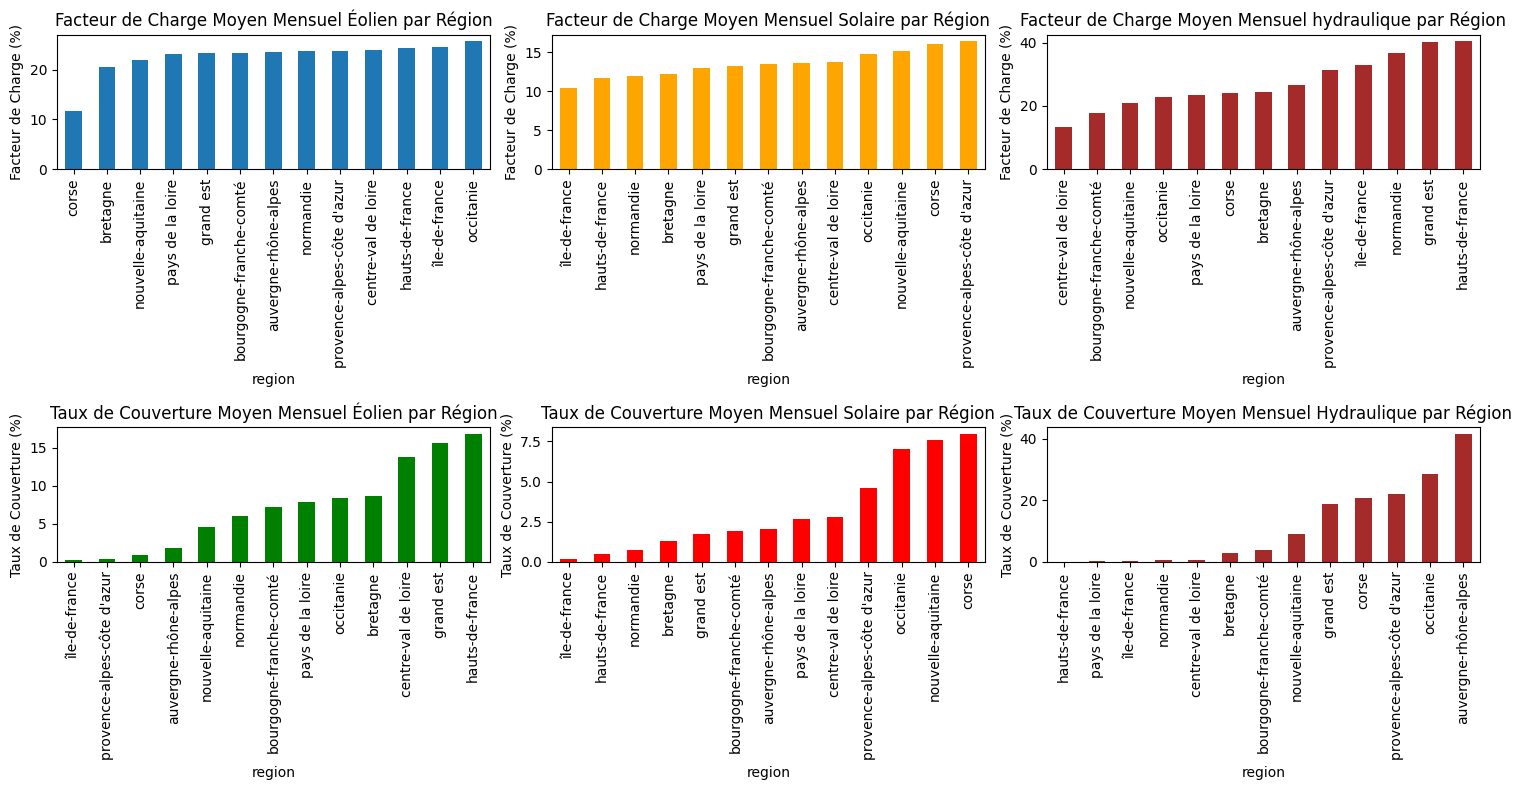

In [86]:
# Examiner les données : statistiques descriptives
print("Statistiques descriptives:")
print(df_cleaned.describe())

# Afficher le nombre de valeurs manquantes par colonne
print("\nValeurs manquantes par colonne:")
print(df_cleaned.isnull().sum())


# Plotting performances énergétiques par région
plt.figure(figsize=(15, 8))

# Facteurs de Charge (FC) 
plt.subplot(2, 3, 1)
df_cleaned.groupby('region')['fc_moyen_mensuel_eolien'].mean().sort_values().plot(kind='bar')
plt.title('Facteur de Charge Moyen Mensuel Éolien par Région')
plt.ylabel('Facteur de Charge (%)')

plt.subplot(2, 3, 2)
df_cleaned.groupby('region')['fc_moyen_mensuel_solaire'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Facteur de Charge Moyen Mensuel Solaire par Région')
plt.ylabel('Facteur de Charge (%)')

plt.subplot(2, 3, 3)
df_cleaned.groupby('region')['fc_moyen_mensuel_hydraulique'].mean().sort_values().plot(kind='bar', color='brown')
plt.title('Facteur de Charge Moyen Mensuel hydraulique par Région')
plt.ylabel('Facteur de Charge (%)')

# Taux de Couverture (TC)
plt.subplot(2, 3, 4)
df_cleaned.groupby('region')['tc_moyen_mensuel_eolien'].mean().sort_values().plot(kind='bar', color='green')
plt.title('Taux de Couverture Moyen Mensuel Éolien par Région')
plt.ylabel('Taux de Couverture (%)')

plt.subplot(2, 3, 5)
df_cleaned.groupby('region')['tc_moyen_mensuel_solaire'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Taux de Couverture Moyen Mensuel Solaire par Région')
plt.ylabel('Taux de Couverture (%)')

plt.subplot(2, 3, 6)
df_cleaned.groupby('region')['tc_moyen_mensuel_hydraulique'].mean().sort_values().plot(kind='bar', color='brown')
plt.title('Taux de Couverture Moyen Mensuel Hydraulique par Région')
plt.ylabel('Taux de Couverture (%)')

plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 3.3873689456632485
Coefficient of Determination (R²): 0.7308779295596977


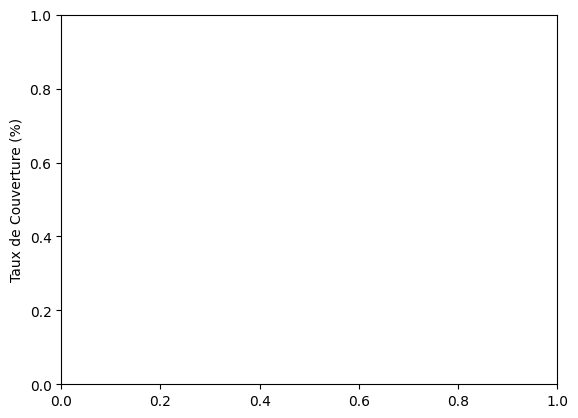

In [87]:
#Entrainer les modèles
df_encoded = pd.get_dummies(df_cleaned, columns=['region'])

plt.ylabel('Taux de Couverture (%)')

X = df_encoded.drop(['code_insee_region','tc_moyen_mensuel_solaire', 'date'], axis=1)
y = df_encoded['tc_moyen_mensuel_solaire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R²): {r2}")


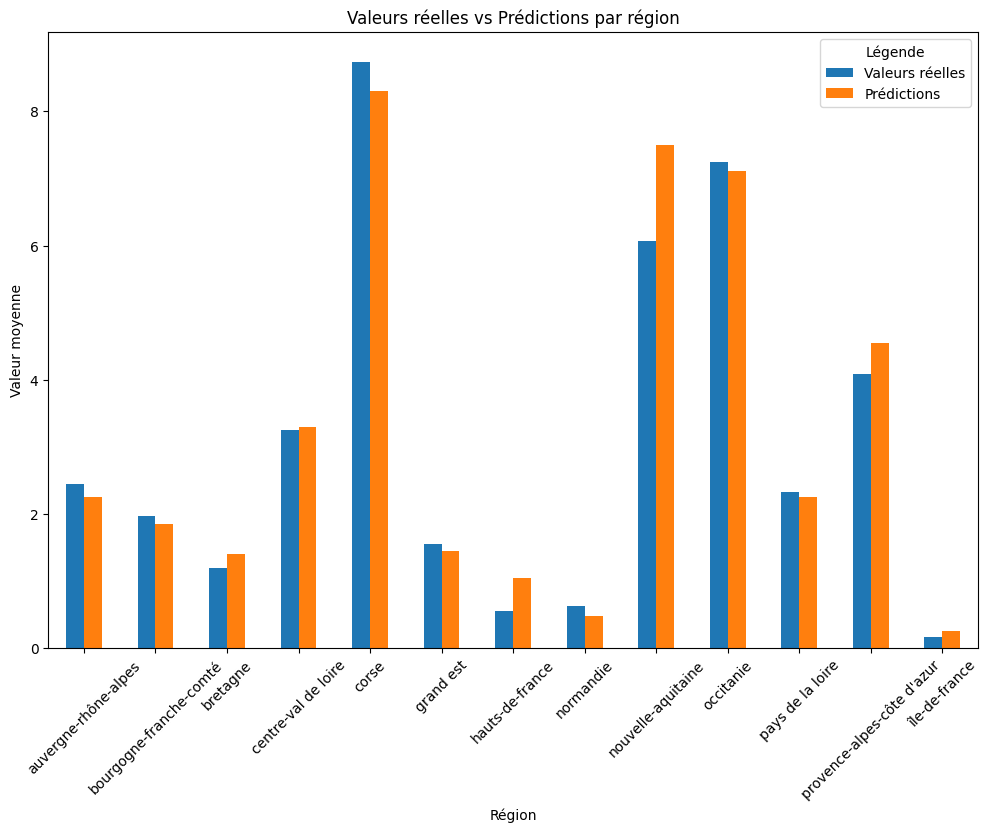

In [88]:
#Diagramme en barres groupées des valeurs réelles vs. prédictions par région 

region_columns = [col for col in X_test.columns if 'region_' in col]

# Trouver la région pour chaque ligne dans X_test
X_test['region'] = X_test[region_columns].idxmax(axis=1).str.replace('region_', '')

# Ajouter les prédictions et les valeurs réelles dans un DataFrame
results = pd.DataFrame({'Valeurs réelles': y_test, 'Prédictions': y_pred, 'Région': X_test['region']})

# Calculer la moyenne des valeurs réelles et prédites par région
mean_results = results.groupby('Région').mean()

# Création du graphique en barres groupées
mean_results.plot(kind='bar', figsize=(12, 8))

plt.title('Valeurs réelles vs Prédictions par région')
plt.ylabel('Valeur moyenne')
plt.xlabel('Région')
plt.xticks(rotation=45)
plt.legend(title='Légende')
plt.show()

Prédictions ajustées pour les nouvelles dates (janvier 2024 à décembre 2024):


,date,region,tc_moyen_mensuel_solaire_prédiction
0,2024-01-01,île-de-france,-1.871822
1,2024-02-01,île-de-france,-1.915057
2,2024-03-01,île-de-france,-1.958293
3,2024-04-01,île-de-france,-2.001528
4,2024-05-01,île-de-france,-2.044763
...,...,...,...
151,2024-08-01,centre-val de loire,-3.473330
152,2024-09-01,centre-val de loire,-3.516565
153,2024-10-01,centre-val de loire,-3.559800
154,2024-11-01,centre-val de loire,-3.603035


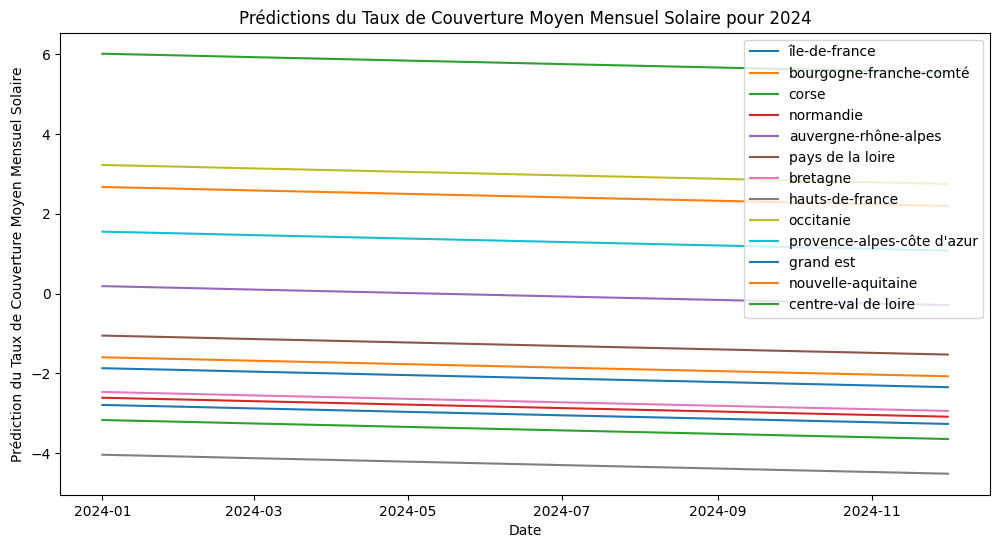

In [89]:
new_dates = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
df_future = pd.DataFrame({'date': new_dates})
regions = df_cleaned['region'].unique()

df_future = pd.concat([df_future.assign(region=region) for region in regions], ignore_index=True)
df_future['mois'] = df_future['date'].dt.month

df_future_encoded = pd.get_dummies(df_future, columns=['region'])

for col in X.columns:
    if col not in df_future_encoded.columns:
        df_future_encoded[col] = 0

X_future = df_future_encoded[X.columns]

future_predictions = model.predict(X_future)

df_future['tc_moyen_mensuel_solaire_prédiction'] = future_predictions

print("Prédictions ajustées pour les nouvelles dates (janvier 2024 à décembre 2024):")
display(df_future[['date', 'region', 'tc_moyen_mensuel_solaire_prédiction']])

plt.figure(figsize=(12, 6))
for region in regions:
    df_plot = df_future[df_future['region'] == region]
    plt.plot(df_plot['date'], df_plot['tc_moyen_mensuel_solaire_prédiction'], label=region)

plt.xlabel('Date')
plt.ylabel('Prédiction du Taux de Couverture Moyen Mensuel Solaire')
plt.title('Prédictions du Taux de Couverture Moyen Mensuel Solaire pour 2024')
plt.legend()
plt.show()
